In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r'C:\Users\JD\Desktop\Python\wine.csv')

In [3]:
df.head()

,class label,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavonoids,non flavonoid phenols,proanthocyanins,color intensity,hue,OD280/OD315 of diluited wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 14 columns):
class label                      178 non-null int64
alcohol                          178 non-null float64
malic acid                       178 non-null float64
ash                              178 non-null float64
alcalinity of ash                178 non-null float64
magnesium                        178 non-null int64
total phenols                    178 non-null float64
flavonoids                       178 non-null float64
non flavonoid phenols            178 non-null float64
proanthocyanins                  178 non-null float64
color intensity                  178 non-null float64
hue                              178 non-null float64
OD280/OD315 of diluited wines    178 non-null float64
proline                          178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 20.9 KB


In [5]:
y=df.iloc[:,0].values #class label=target

In [6]:
x=df.iloc[:,1:].values #ft

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [8]:
#divido dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [9]:
#standardizzo x

x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

In [10]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [11]:
#imposto regressione

logreg.fit(x_train_std,y_train)

LogisticRegression()

In [12]:
#convalida incrociata e albero decisionale

from sklearn.model_selection import cross_val_score
cvs=cross_val_score
from sklearn.tree import DecisionTreeClassifier
treeclf=DecisionTreeClassifier()

In [13]:
import numpy as np

In [14]:
#accuratezza convalida incrociata regressione

np.mean(cvs(logreg,x_train_std,y_train))

0.976

In [15]:
#accuratezza convalida incrociata albero decisionale

np.mean(cvs(treeclf,x_train,y_train))

0.8876666666666667

In [16]:
treeclf.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
#creo ft (senza class label)

ft=list(df.columns)
del ft[0]

In [18]:
#caratteristiche determinanti con Decision Tree Classifier

pd.DataFrame({'ft':ft,'imp':treeclf.feature_importances_}).sort_values('imp',ascending=False).head()

,ft,imp
12,proline,0.410014
6,flavonoids,0.397143
9,color intensity,0.105658
0,alcohol,0.041377
4,magnesium,0.029448


In [19]:
from sklearn import tree
import matplotlib.pyplot as plt

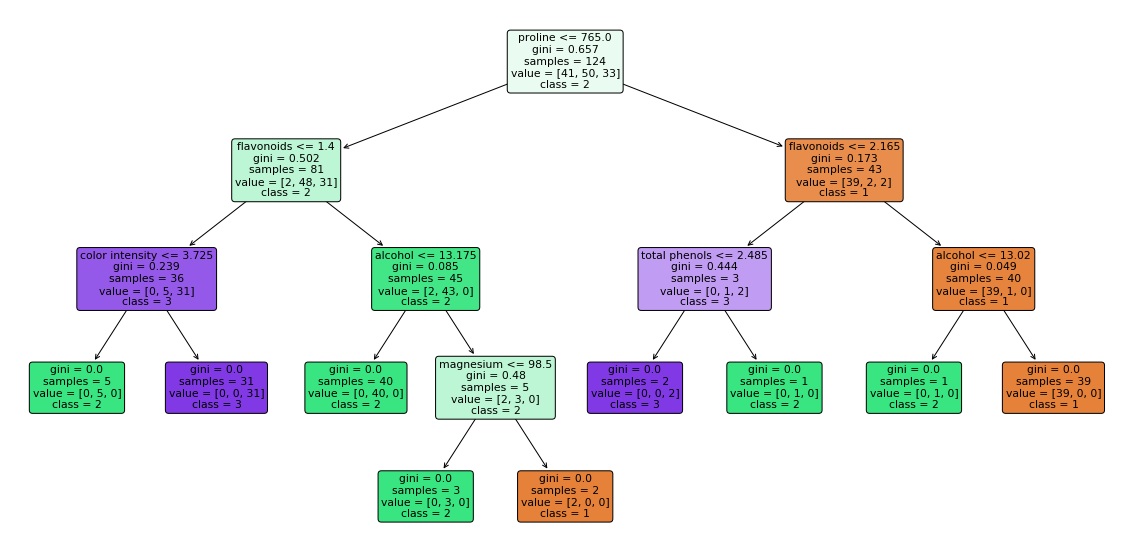

In [20]:
#albero decisionale

plt.figure(figsize=(20,10))
tree.plot_tree(treeclf,feature_names=ft,class_names=['1','2','3'],filled=True,rounded=True)
plt.show()

In [21]:
#altro albero decisionale (Random Forest Classifier)

from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=500,random_state=1)

In [22]:
forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [23]:
#caratteristiche determinanti con Random Forest Classifier

pd.DataFrame({'ft':ft,'imp':forest.feature_importances_}).sort_values('imp',ascending=False).head(7)

,ft,imp
12,proline,0.185453
6,flavonoids,0.174751
9,color intensity,0.143920
11,OD280/OD315 of diluited wines,0.136162
0,alcohol,0.118529
10,hue,0.058739
5,total phenols,0.050872


In [24]:
#accuratezza Random Forest Classifier

np.mean(cvs(forest,x_train,y_train))

0.96

In [25]:
#treeclf: 0.89
#forest : 0.96

#uso forest

In [26]:
ft=['proline','flavonoids','color intensity','OD280/OD315 of diluited wines','alcohol']

In [27]:
x=df[ft].values

In [28]:
#imposto regressione con nuovi parametri x

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [29]:
x_train_std=scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)
logreg.fit(x_train_std,y_train)

LogisticRegression()